# CS235 Fall 2024 Course Project Phase 2

Student 1 - Name: Ashok Kumar J (862467018)

Student 2 - Name: Dan Shay (862546326)

In [1]:
!pip install ucimlrepo

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist


In [3]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

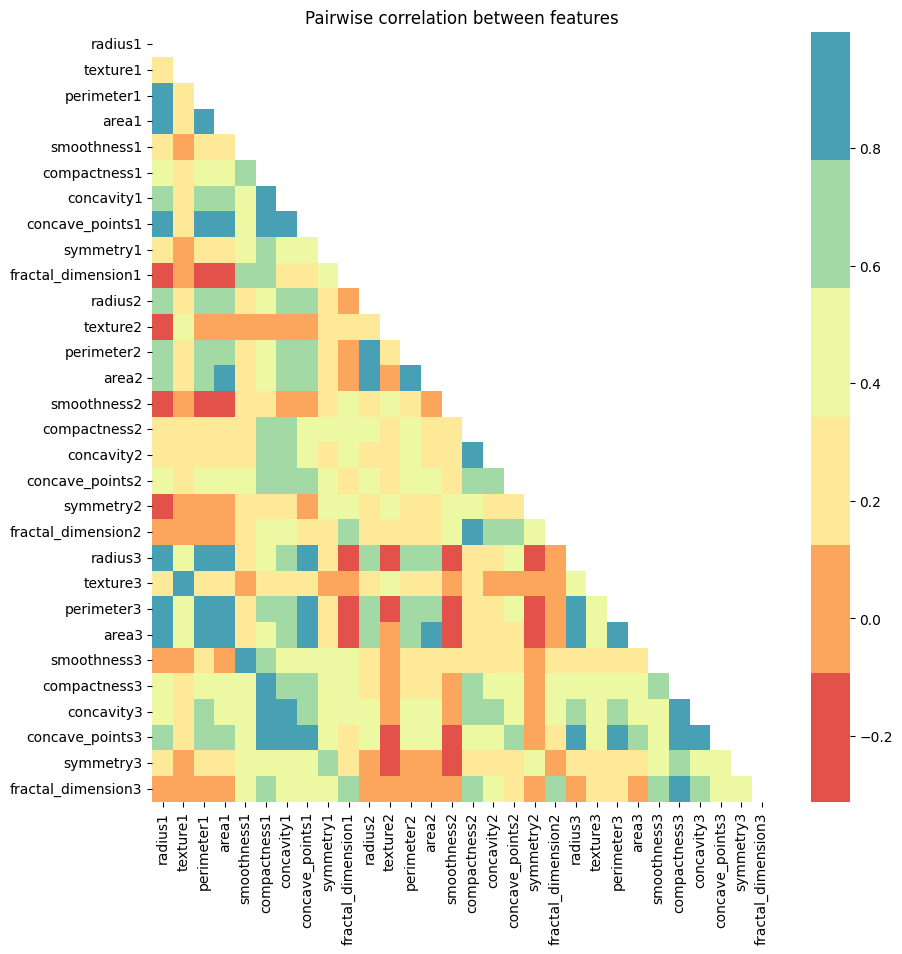

In [4]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class-wise counts

In [5]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

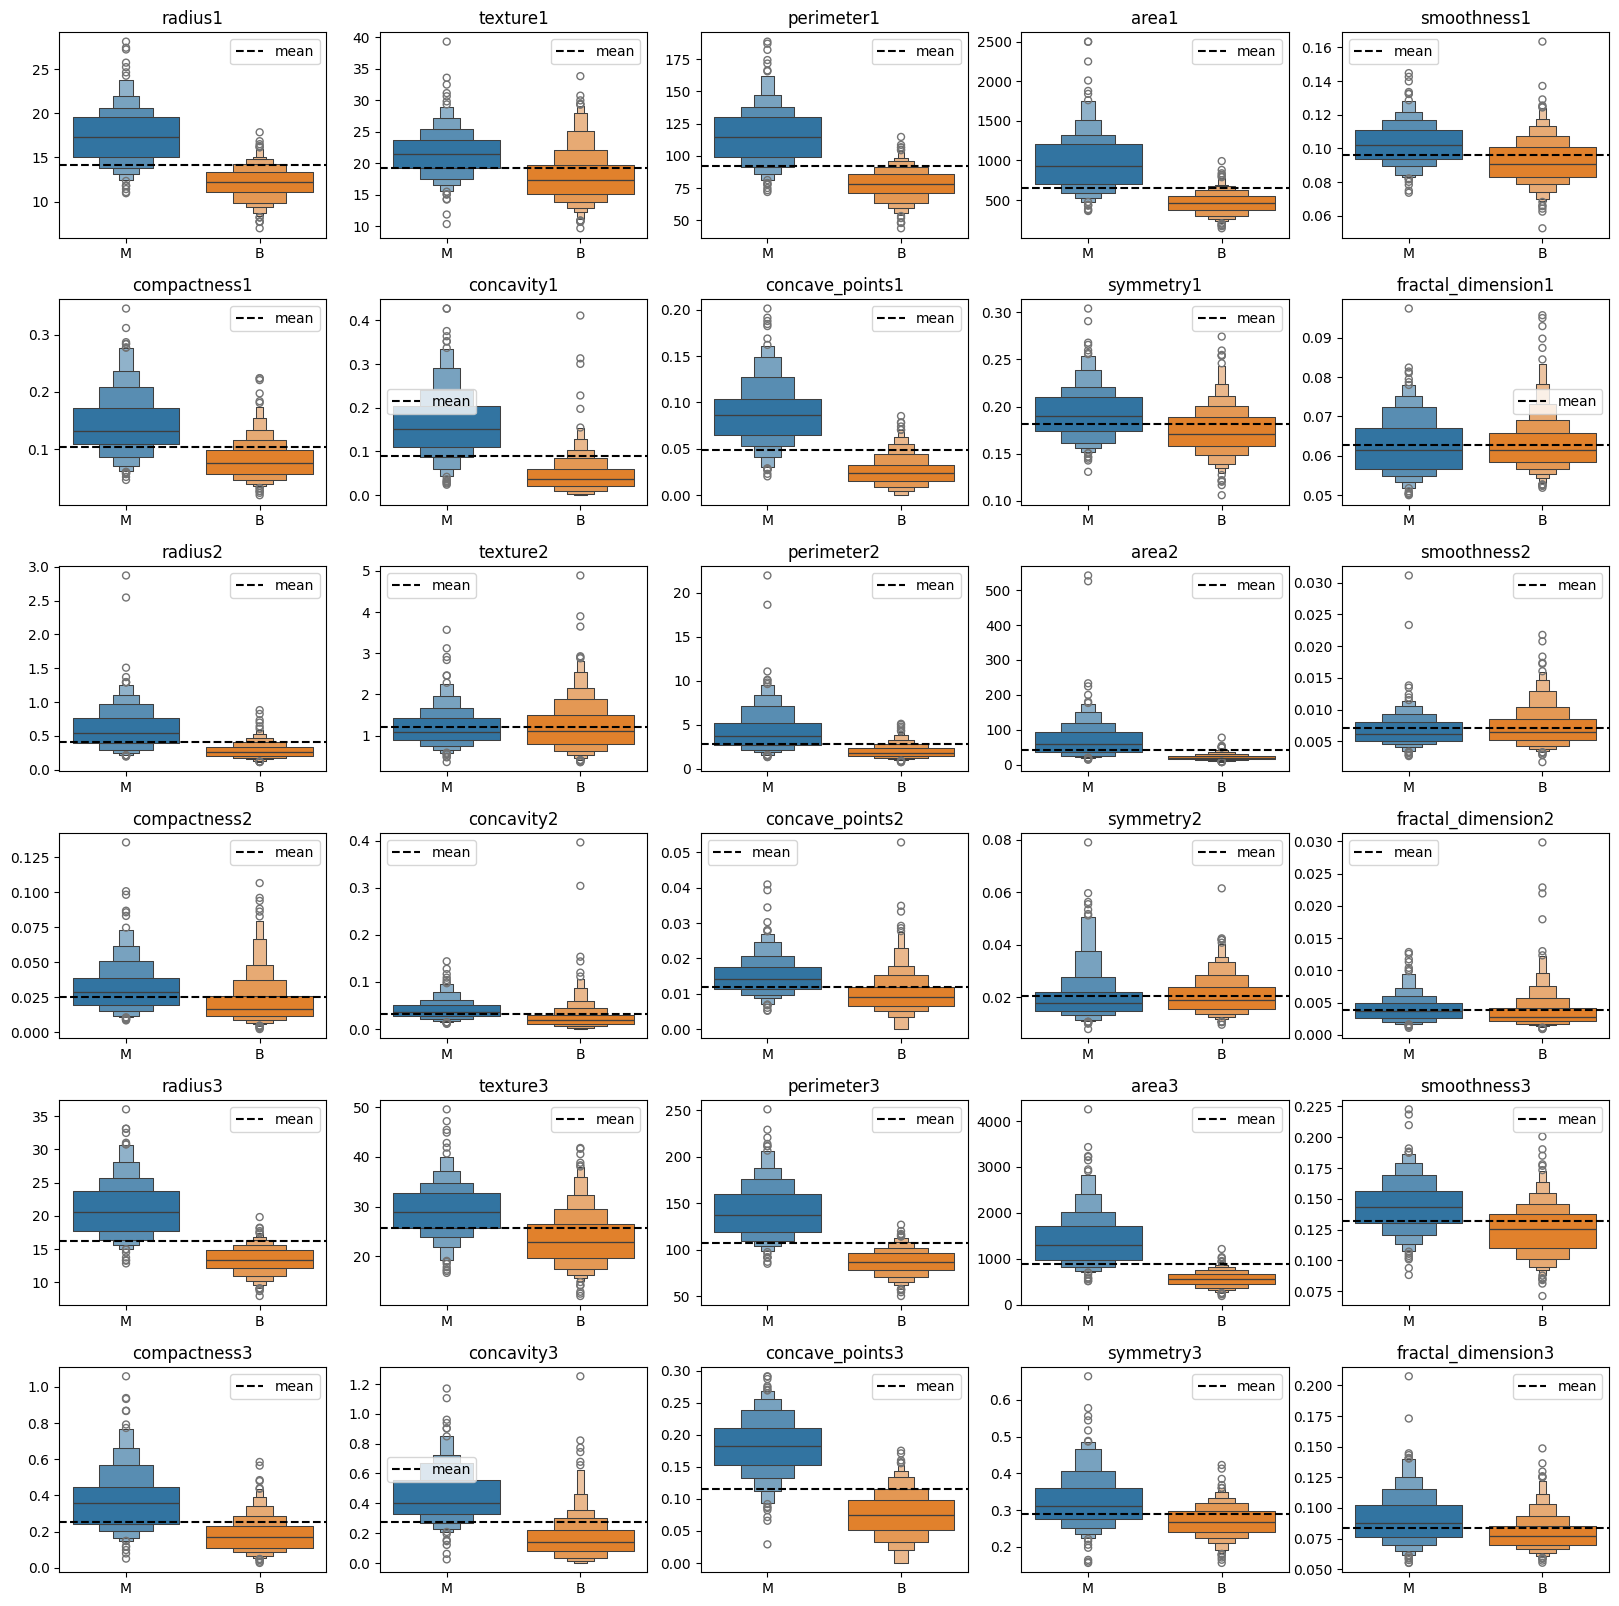

In [6]:
plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(6,5,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.ylabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 2 - Unsupervised Techniques

## Q1 - k-Means clustering

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Verify the scaled data
print("Feature ranges after Min-Max Scaling:")
print(f"Min: {X_scaled.min(axis=0)}, Max: {X_scaled.max(axis=0)}")


Feature ranges after Min-Max Scaling:
Min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], Max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
def initialize_centroids(X, k, init_method='random'):
    """
    Initialize the centroids for k-means clustering.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k (int): The number of clusters.
    init_method (str): Method for initializing centroids ('random' or 'kmeans++').

    Returns:
    ndarray: Initial centroids, shape (k, n_features).
    """
    if init_method == 'random':
        # Random initialization: Select k random data points as centroids
        indices = np.random.choice(X.shape[0], k, replace=False)
        return X[indices]
    elif init_method == 'kmeans++':
        # k-means++ initialization: Start with one random centroid, then iteratively choose the next
        centroids = []
        centroids.append(X[np.random.choice(range(X.shape[0]))])  # First centroid randomly
        for _ in range(1, k):
            # Compute squared distances to the nearest centroid for each data point
            dist_sq = np.min(np.linalg.norm(X[:, np.newaxis] - np.array(centroids), axis=2)**2, axis=1)
            prob = dist_sq / dist_sq.sum()  # Probability proportional to squared distance
            cumulative_prob = np.cumsum(prob)
            r = np.random.rand()  # Random number to select next centroid
            for i, p in enumerate(cumulative_prob):
                if r < p:
                    centroids.append(X[i])
                    break
        return np.array(centroids)

In [9]:
def assign_clusters(X, centroids):
    """
    Assign each data point to the nearest centroid.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    centroids (ndarray): Current centroids, shape (k, n_features).

    Returns:
    ndarray: Cluster assignments for each data point, shape (n_samples,).
    """
    # Compute distances between each data point and each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    # Assign each point to the cluster with the nearest centroid
    return np.argmin(distances, axis=1)

def compute_centroids(X, labels, k):
    """
    Compute new centroids as the mean of all points assigned to each cluster.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    labels (ndarray): Cluster assignments for each data point, shape (n_samples,).
    k (int): Number of clusters.

    Returns:
    ndarray: Updated centroids, shape (k, n_features).
    """
    # Compute the mean of all points assigned to each cluster
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [10]:
def kmeans(X, k, init_method='random', max_iters=100, tol=1e-4):
    """
    Perform k-means clustering using Lloyd's algorithm.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k (int): Number of clusters.
    init_method (str): Method for initializing centroids ('random' or 'kmeans++').
    max_iters (int): Maximum number of iterations to run the algorithm.
    tol (float): Convergence tolerance for changes in centroid positions.

    Returns:
    tuple: (Cluster assignments, Final centroids)
    """
    # Initialize centroids based on the specified method
    centroids = initialize_centroids(X, k, init_method)
    for iteration in range(max_iters):
        old_centroids = centroids  # Keep a copy of the previous centroids
        # Step 1: Assign points to the nearest cluster
        labels = assign_clusters(X, centroids)
        # Step 2: Compute new centroids
        centroids = compute_centroids(X, labels, k)
        # Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids

In [11]:
def evaluate_kmeans(X, k_range, init_method):
    """
    Evaluate k-means performance for a range of cluster numbers.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k_range (range): Range of cluster numbers to evaluate (e.g., range(1, 6)).
    init_method (str): Method for initializing centroids ('random' or 'kmeans++').

    Returns:
    list: Mean and standard deviation of silhouette scores for each k.
    """
    silhouette_scores = []
    print(f"Evaluating k-means clustering with {init_method} initialization:")
    for k in k_range:
        if k == 1:
            # Handle k=1 separately (Silhouette is undefined)
            print(f"k = {k}: Silhouette Coefficient is undefined (only one cluster).")
            silhouette_scores.append((np.nan, np.nan))
            continue

        scores = []
        for _ in range(10):  # Run k-means 10 times with different initializations
            labels, _ = kmeans(X, k, init_method)
            # Check for valid clusters (at least 2 clusters)
            n_clusters = len(np.unique(labels))
            if n_clusters < 2:
                print(f"  Warning: Only {n_clusters} cluster(s) found. Skipping this run.")
                continue

            # Compute Silhouette Score only if valid clusters are present
            score = silhouette_score(X, labels)
            scores.append(score)

        # Handle empty scores list
        if len(scores) == 0:
            print(f"k = {k}: No valid clustering results. Skipping.")
            silhouette_scores.append((np.nan, np.nan))
        else:
            # Store mean and standard deviation of scores for this k
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            silhouette_scores.append((mean_score, std_score))
            print(f"k = {k}: Mean Silhouette Coefficient = {mean_score:.4f}, Std Dev = {std_score:.4f}")

    return silhouette_scores


In [12]:
# Evaluate performance for k ranging from 1 to 5
k_range = range(1, 6)

# Random initialization
random_scores = evaluate_kmeans(X_scaled, k_range, 'random')

# k-means++ initialization
kmeanspp_scores = evaluate_kmeans(X_scaled, k_range, 'kmeans++')

Evaluating k-means clustering with random initialization:
k = 1: Silhouette Coefficient is undefined (only one cluster).
k = 2: Mean Silhouette Coefficient = 0.3845, Std Dev = 0.0000
k = 3: Mean Silhouette Coefficient = 0.3308, Std Dev = 0.0007
k = 4: Mean Silhouette Coefficient = 0.1717, Std Dev = 0.0193
k = 5: Mean Silhouette Coefficient = 0.1568, Std Dev = 0.0042
Evaluating k-means clustering with kmeans++ initialization:
k = 1: Silhouette Coefficient is undefined (only one cluster).
k = 2: Mean Silhouette Coefficient = 0.3845, Std Dev = 0.0000
k = 3: Mean Silhouette Coefficient = 0.3228, Std Dev = 0.0234
k = 4: Mean Silhouette Coefficient = 0.2207, Std Dev = 0.0558
k = 5: Mean Silhouette Coefficient = 0.1589, Std Dev = 0.0104


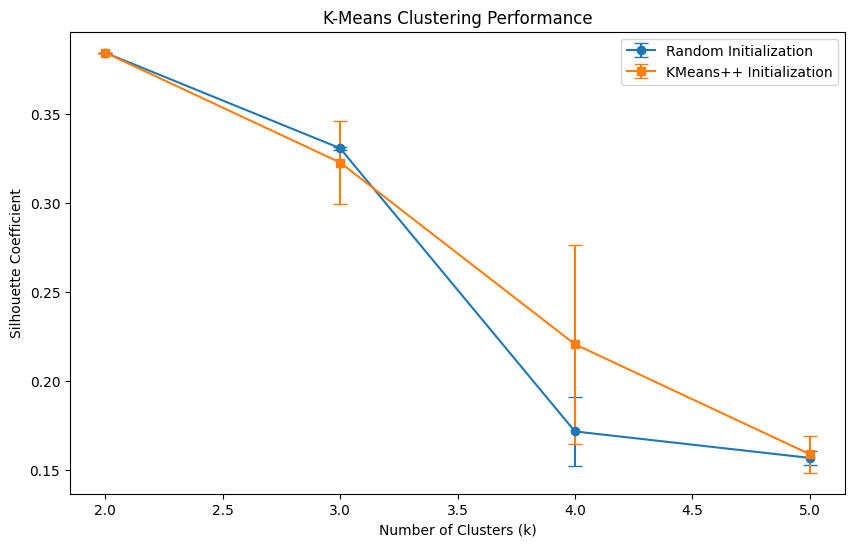

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(k_range, [s[0] for s in random_scores], yerr=[s[1] for s in random_scores],
             label='Random Initialization', capsize=5, fmt='o-')
plt.errorbar(k_range, [s[0] for s in kmeanspp_scores], yerr=[s[1] for s in kmeanspp_scores],
             label='KMeans++ Initialization', capsize=5, fmt='s-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('K-Means Clustering Performance')
plt.legend()
plt.show()

## Q2 - Density-based clustering with DBSCAN

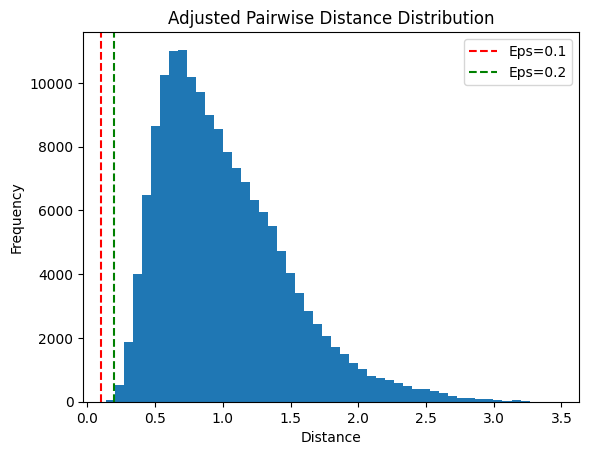

First 5 rows after L2 normalization:
[[0.18681917 0.00812411 0.19576544 0.13041722 0.21289144 0.28398679
  0.25211233 0.26214236 0.24609726 0.21710991 0.12769733 0.04319458
  0.13231784 0.09817566 0.05711582 0.12599472 0.04864903 0.10778983
  0.1117411  0.06563029 0.22258049 0.05074394 0.23962415 0.1615988
  0.21553864 0.22204841 0.2038765  0.32700955 0.21458008 0.15018464]
 [0.35062326 0.148599   0.33570675 0.27345233 0.15803392 0.09909451
  0.11100117 0.1901322  0.20705457 0.07704492 0.08528465 0.04502522
  0.06784124 0.06850598 0.06508611 0.0443349  0.02560648 0.13838382
  0.04608801 0.04967052 0.33086464 0.16549812 0.29429258 0.23726591
  0.18947574 0.08426335 0.10520219 0.34845935 0.1273461  0.12150653]
 [0.26522884 0.17208491 0.26269234 0.19816984 0.22678398 0.19005627
  0.20394405 0.28030502 0.2247058  0.09314907 0.10125139 0.04158259
  0.07953412 0.07184019 0.06650884 0.12520952 0.0426696  0.17190243
  0.09069893 0.05600295 0.24533765 0.15877453 0.22419681 0.16513911
  0.213238

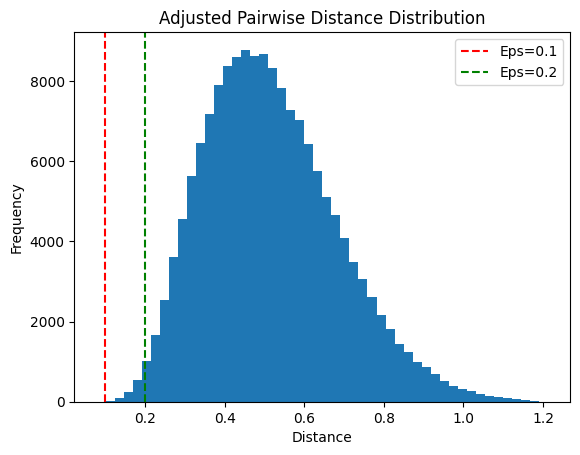

In [14]:
# Define parameters for DBSCAN
eps_values = [0.1, 0.2]
min_pts_values = [5, 10, 15, 20]

# Verify distances
from scipy.spatial.distance import pdist
distances = pdist(X_scaled)
plt.hist(distances, bins=50)
plt.axvline(x=0.1, color='r', linestyle='--', label="Eps=0.1")
plt.axvline(x=0.2, color='g', linestyle='--', label="Eps=0.2")
plt.legend()
plt.title("Adjusted Pairwise Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

# Apply L2 normalization to the dataset
X_scaled = normalize(X_scaled, norm='l2')

# Check the first few rows to verify normalization
print("First 5 rows after L2 normalization:")
print(X_scaled[:5])

# Verify that all points have unit norm
norms = np.linalg.norm(X_scaled, axis=1)
print("Norms of first 5 data points:", norms[:5])  # Should all be 1

# Verify distances
from scipy.spatial.distance import pdist
distances = pdist(X_scaled)
plt.hist(distances, bins=50)
plt.axvline(x=0.1, color='r', linestyle='--', label="Eps=0.1")
plt.axvline(x=0.2, color='g', linestyle='--', label="Eps=0.2")
plt.legend()
plt.title("Adjusted Pairwise Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()


In [15]:

def dbscan(D, eps, min_pts):
    """
    DBSCAN clustering algorithm.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    eps (float): Maximum distance for two points to be considered neighbors.
    min_pts (int): Minimum number of points to form a dense region (cluster).

    Returns:
    List of cluster labels.
        -1 means noise
        clusters are numbered starting from 1.
    """
    labels = [0] * len(D)  # Initialize all points as unvisited (0)
    C = 0  # Cluster ID

    for P in range(len(D)):
        if labels[P] != 0:  # Skip already visited points
            continue

        NeighborPts = region_query(D, P, eps)
        if len(NeighborPts) < min_pts:
            labels[P] = -1  # Mark as noise
        else:
            C += 1  # Start a new cluster
            grow_cluster(D, labels, P, NeighborPts, C, eps, min_pts)

    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, min_pts):
    '''
    Expand the cluster from the seed point `P` using cosine distance.
    '''
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1:
            labels[Pn] = C  # Noise point becomes part of the cluster
        elif labels[Pn] == 0:
            labels[Pn] = C  # Claim the unvisited point
            PnNeighborPts = region_query(D, Pn, eps)
            if len(PnNeighborPts) >= min_pts:
                NeighborPts.extend(PnNeighborPts)  # Add neighbors to the queue
        i += 1


def region_query(D, P, eps):
    '''
    Find all points in dataset `D` within Euclidean distance `eps` of point `P`.
    '''
    neighbors = []
    for Pn in range(len(D)):
        # Compute Euclidean distance between point P and Pn
        if np.linalg.norm(D[P] - D[Pn]) <= eps:
            neighbors.append(Pn)
    return neighbors

def region_query_debug(D, P, eps):
    '''
    Calculate the number of neighbors within eps distance for a given point P.
    '''
    # Compute Euclidean distances
    distances = np.linalg.norm(D - D[P], axis=1)
    return np.where(distances <= eps)[0]

# Convert DataFrame to NumPy array if D is a DataFrame
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

# Test neighbor counts for the first 5 points
for eps in [0.1, 0.2]:
    print(f"Evaluating neighbor counts for eps={eps}")
    for i in range(5):  # Check the first 5 points
        neighbors = region_query_debug(X, i, eps)
        print(f"  Point {i} has {len(neighbors)} neighbors.")


Evaluating neighbor counts for eps=0.1
  Point 0 has 1 neighbors.
  Point 1 has 1 neighbors.
  Point 2 has 1 neighbors.
  Point 3 has 1 neighbors.
  Point 4 has 1 neighbors.
Evaluating neighbor counts for eps=0.2
  Point 0 has 1 neighbors.
  Point 1 has 1 neighbors.
  Point 2 has 1 neighbors.
  Point 3 has 1 neighbors.
  Point 4 has 1 neighbors.


In [16]:
def evaluate_dbscan(X, eps_values, min_pts_values, n_runs):
    """
    Evaluate DBSCAN clustering performance with mean and standard deviation of Silhouette coefficient.

    Parameters:
    X (ndarray): Dataset, shape (n_samples, n_features).
    eps_values (list): List of epsilon values for DBSCAN.
    min_pts_values (list): List of MinPts values for DBSCAN.
    n_runs (int): Number of times to run DBSCAN for each combination.

    Returns:
    dict: Dictionary containing mean and std of silhouette scores for each (eps, min_pts) pair.
    """
    results = {}
    for eps in eps_values:
        print(f"Evaluating for Eps={eps}")
        mean_scores = []
        std_scores = []
        for min_pts in min_pts_values:
            if len(X) < min_pts:
                print(f"  Skipping MinPts={min_pts} as it exceeds dataset size.")
                mean_scores.append(0)
                std_scores.append(0)
                continue

            print(f"  Evaluating MinPts={min_pts}")
            scores = []
            for run in range(n_runs):
                labels = dbscan(X, eps=eps, min_pts=min_pts)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                if n_clusters > 1:  # Silhouette score requires at least 2 clusters
                    score = silhouette_score(X, labels)
                    scores.append(score)
                else:
                    scores.append(0)  # Assign 0 when silhouette score cannot be computed
                print(f"    Run {run + 1}/{n_runs}, Silhouette Score: {scores[-1]:.4f}")

            # Compute mean and standard deviation of the silhouette scores
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            mean_scores.append(mean_score)
            std_scores.append(std_score)
            print(f"  MinPts={min_pts}, Mean Score: {mean_score:.4f}, Std Dev: {std_score:.4f}")

        results[eps] = {'mean': mean_scores, 'std': std_scores}
        print(f"Results for Eps={eps}: {results[eps]}")
    return results


In [17]:
def plot_clusters(X, labels, eps, min_pts):
    """
    Visualize DBSCAN clusters.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    labels (ndarray): Cluster labels for each point, shape (n_samples,).
    eps (float): Epsilon value used in DBSCAN.
    min_pts (int): MinPts value used in DBSCAN.
    """
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:  # Noise
            color = 'k'
            label_text = "Noise"
        else:
            color = plt.cm.jet(float(label) / max(unique_labels))
            label_text = f"Cluster {label}"
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=label_text, alpha=0.6)
    plt.title(f"DBSCAN Clusters (Eps={eps}, MinPts={min_pts})")
    plt.legend()
    plt.show()

def plot_silhouette_scores(results, min_pts_values, eps_values):
    """
    Plot DBSCAN performance with error bars for mean +/- std of silhouette scores.

    Parameters:
    results (dict): Dictionary with mean and std silhouette scores for each (eps, min_pts) pair.
    min_pts_values (list): List of MinPts values used as the x-axis.
    eps_values (list): List of Eps values for which results are plotted.
    """
    plt.figure(figsize=(10, 6))
    for eps in eps_values:
        mean_scores = results[eps]['mean']
        std_scores = results[eps]['std']
        plt.errorbar(min_pts_values, mean_scores, yerr=std_scores, label=f"Eps={eps}", fmt='o-', capsize=5)
    plt.xlabel('MinPts')
    plt.ylabel('Silhouette Coefficient')
    plt.title('DBSCAN Performance with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
# Evaluate DBSCAN
results = evaluate_dbscan(X_scaled, eps_values, min_pts_values, n_runs=10)

Evaluating for Eps=0.1
  Evaluating MinPts=5
    Run 1/10, Silhouette Score: 0.0000
    Run 2/10, Silhouette Score: 0.0000
    Run 3/10, Silhouette Score: 0.0000
    Run 4/10, Silhouette Score: 0.0000
    Run 5/10, Silhouette Score: 0.0000
    Run 6/10, Silhouette Score: 0.0000
    Run 7/10, Silhouette Score: 0.0000
    Run 8/10, Silhouette Score: 0.0000
    Run 9/10, Silhouette Score: 0.0000
    Run 10/10, Silhouette Score: 0.0000
  MinPts=5, Mean Score: 0.0000, Std Dev: 0.0000
  Evaluating MinPts=10
    Run 1/10, Silhouette Score: 0.0000
    Run 2/10, Silhouette Score: 0.0000
    Run 3/10, Silhouette Score: 0.0000
    Run 4/10, Silhouette Score: 0.0000
    Run 5/10, Silhouette Score: 0.0000
    Run 6/10, Silhouette Score: 0.0000
    Run 7/10, Silhouette Score: 0.0000
    Run 8/10, Silhouette Score: 0.0000
    Run 9/10, Silhouette Score: 0.0000
    Run 10/10, Silhouette Score: 0.0000
  MinPts=10, Mean Score: 0.0000, Std Dev: 0.0000
  Evaluating MinPts=15
    Run 1/10, Silhouette Score

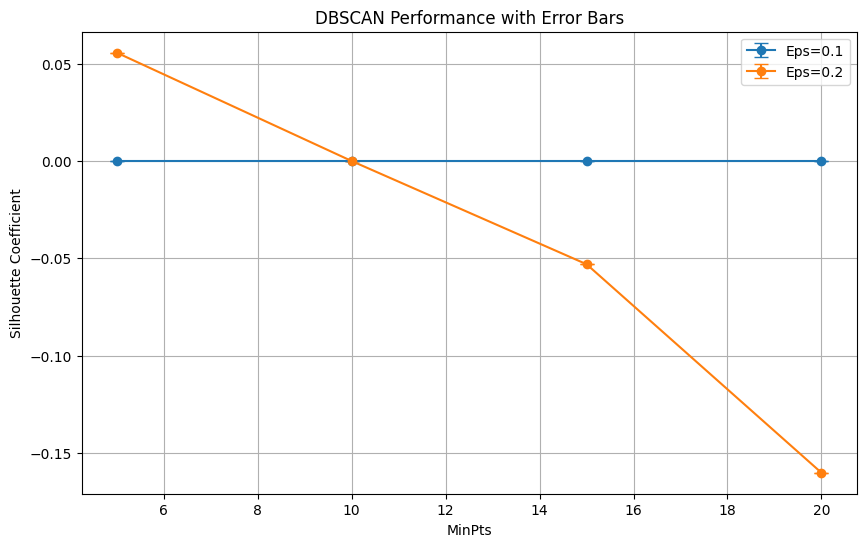

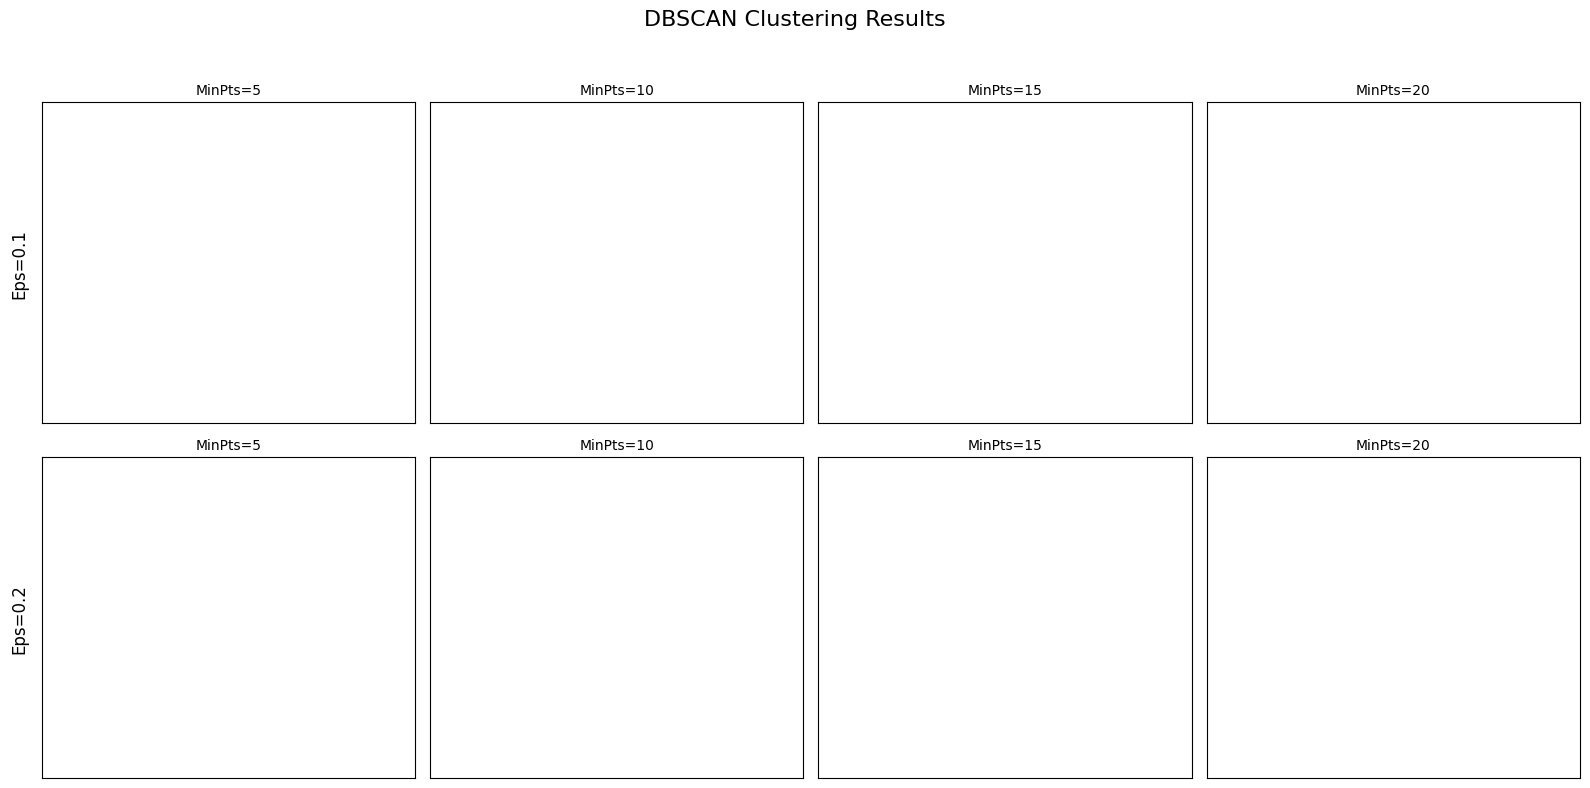

In [19]:
# Plot silhouette scores
plot_silhouette_scores(results, min_pts_values, eps_values)

# Visualize for all eps and min_pts combinations
def visualize_all_combinations(X, eps_values, min_pts_values):
    fig, axes = plt.subplots(len(eps_values), len(min_pts_values), figsize=(16, 8), sharex=True, sharey=True)
    fig.suptitle("DBSCAN Clustering Results", fontsize=16)

    for row, eps in enumerate(eps_values):
        for col, min_pts in enumerate(min_pts_values):
            ax = axes[row, col]
            labels = dbscan(X, eps=eps, min_pts=min_pts)
            unique_labels = set(labels)
            for label in unique_labels:
                if label == -1:  # Noise
                    color = 'k'
                    label_text = "Noise"
                else:
                    color = plt.cm.jet(float(label) / max(unique_labels))
                    label_text = f"Cluster {label}"
                ax.scatter(X[labels == label, 0], X[labels == label, 1], alpha=0.6, s=10)

            ax.set_title(f"MinPts={min_pts}", fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])

    # Add labels for rows
    for row, eps in enumerate(eps_values):
        axes[row, 0].set_ylabel(f"Eps={eps}", fontsize=12, rotation=90, labelpad=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call the visualization function
visualize_all_combinations(X_scaled, eps_values, min_pts_values)

## Q3 - Graph Based clustering with spectral clustering

In [20]:
def gaussian_similarity(X, sigma):
    """
    Compute the Gaussian similarity matrix.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    sigma (float): Bandwidth parameter for the Gaussian kernel.

    Returns:
    ndarray: Adjacency matrix, shape (n_samples, n_samples).
    """
    n_samples = X.shape[0]
    similarity_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            diff = np.linalg.norm(X[i] - X[j]) ** 2
            similarity_matrix[i, j] = np.exp(-diff / (2 * sigma**2))
    return similarity_matrix

def laplacian_matrix(similarity_matrix):
    """
    Compute the unnormalized Laplacian matrix.

    Parameters:
    similarity_matrix (ndarray): Adjacency matrix, shape (n_samples, n_samples).

    Returns:
    ndarray: Laplacian matrix, shape (n_samples, n_samples).
    """
    degree_matrix = np.diag(similarity_matrix.sum(axis=1))
    return degree_matrix - similarity_matrix

In [21]:
def spectral_clustering(X, k, sigma):
    """
    Perform unnormalized spectral clustering.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k (int): Number of clusters.
    sigma (float): Bandwidth parameter for the Gaussian kernel.

    Returns:
    ndarray: Cluster labels for each data point, shape (n_samples,).
    """
    # Step 1: Compute the similarity matrix
    similarity_matrix = gaussian_similarity(X, sigma)

    # Step 2: Compute the Laplacian matrix
    laplacian = laplacian_matrix(similarity_matrix)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

    # Step 4: Use the first k eigenvectors for clustering
    features = eigenvectors[:, :k]

    # Step 5: Normalize rows of eigenvectors
    features = features / np.linalg.norm(features, axis=1, keepdims=True)

    # Step 6: Cluster the rows using the custom kmeans function
    labels, _ = kmeans(features, k, init_method='kmeans++')
    return labels

In [22]:
def evaluate_spectral_clustering(X, k_range, sigma_values, n_runs=10):
    """
    Evaluate spectral clustering performance with mean and standard deviation of Silhouette coefficient.

    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k_range (range): Range of cluster numbers to evaluate (e.g., range(1, 6)).
    sigma_values (list): List of sigma values for the Gaussian kernel.
    n_runs (int): Number of runs for each (k, sigma) configuration.

    Returns:
    dict: Dictionary containing mean and std silhouette scores for each (k, sigma) pair.
    """
    results = {}
    for sigma in sigma_values:
        print(f"Evaluating for Sigma={sigma}")
        mean_scores = []
        std_scores = []
        for k in k_range:
            if k == 1:
                # Silhouette score is undefined for k=1
                mean_scores.append(np.nan)
                std_scores.append(np.nan)
                continue

            scores = []
            for _ in range(n_runs):
                labels = spectral_clustering(X, k, sigma)
                if len(set(labels)) > 1:  # At least 2 clusters for silhouette
                    score = silhouette_score(X, labels)
                    scores.append(score)
                else:
                    scores.append(0)
            mean_scores.append(np.mean(scores))
            std_scores.append(np.std(scores))
        results[sigma] = {'mean': mean_scores, 'std': std_scores}
        print(f"Results for Sigma={sigma}: {results[sigma]}")
    return results

In [23]:
# Parameters
k_range = range(1, 6)  # Clusters k = 1 to 5
sigma_values = [0.1, 1, 10]

In [24]:
# Evaluate spectral clustering
results = evaluate_spectral_clustering(X_scaled, k_range, sigma_values)

Evaluating for Sigma=0.1
Results for Sigma=0.1: {'mean': [nan, 0.48029218733265494, 0.26285495794757546, 0.22055625132789686, 0.2008452921465258], 'std': [nan, 0.0, 0.0, 2.7755575615628914e-17, 0.012391692906470273]}
Evaluating for Sigma=1
Results for Sigma=1: {'mean': [nan, 0.48029218733265494, 0.42056532464296187, 0.30347936841536793, 0.22349428322097514], 'std': [nan, 0.0, 0.0, 0.0700876203201407, 0.059627677356097857]}
Evaluating for Sigma=10
Results for Sigma=10: {'mean': [nan, 0.48029218733265494, 0.34242508939158517, 0.32217297521220895, 0.17555181561396555], 'std': [nan, 0.0, 0.11975488058455604, 0.07663176673823031, 0.04599318996948213]}


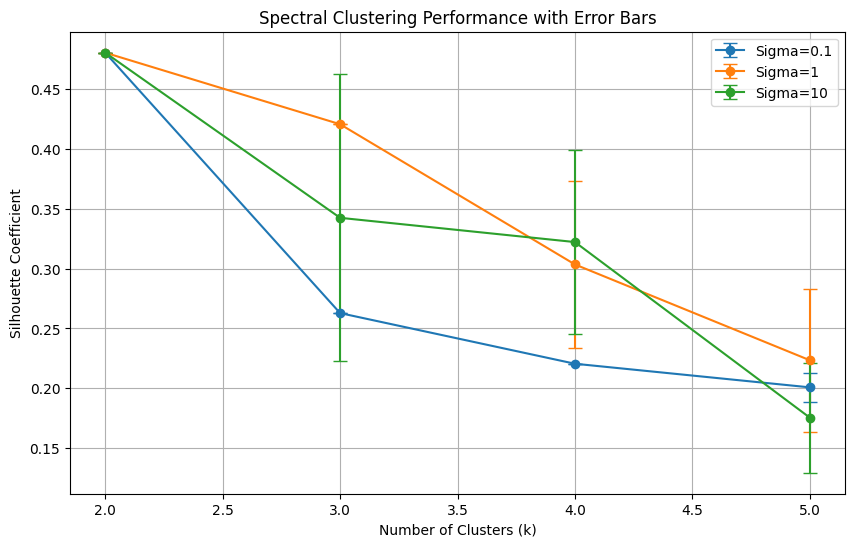

In [25]:
def plot_results_with_error_bars(results, k_range, sigma_values):
    """
    Plot spectral clustering performance with error bars for different sigma values.

    Parameters:
    results (dict): Dictionary with mean and std silhouette scores for each (k, sigma) pair.
    k_range (range): Range of cluster numbers (k values).
    sigma_values (list): List of sigma values used in the evaluation.
    """
    plt.figure(figsize=(10, 6))
    for sigma in sigma_values:
        mean_scores = results[sigma]["mean"]
        std_scores = results[sigma]["std"]
        plt.errorbar(
            k_range, mean_scores, yerr=std_scores, label=f"Sigma={sigma}", fmt="o-", capsize=5
        )
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Coefficient")
    plt.title("Spectral Clustering Performance with Error Bars")
    plt.legend()
    plt.grid()
    plt.show()

# Plot Results
plot_results_with_error_bars(results, k_range, sigma_values)

## Q4 - Anomaly detection with the Isolation Forest

In [26]:
def fit_isolation_tree(X, max_depth, current_depth=0):
    """
    Fit an individual Isolation Tree.

    Parameters:
    X (ndarray): Subset of the dataset, shape (n_samples, n_features).
    max_depth (int): Maximum depth of the tree.
    current_depth (int): Current depth of the tree.

    Returns:
    dict: A representation of the isolation tree.
    """
    if current_depth >= max_depth or len(X) <= 1:
        return {"size": len(X)}

    split_attr = np.random.choice(X.shape[1])
    min_val, max_val = X[:, split_attr].min(), X[:, split_attr].max()
    if min_val == max_val:
        return {"size": len(X)}

    split_val = np.random.uniform(min_val, max_val)
    left_mask = X[:, split_attr] < split_val
    left_subtree = fit_isolation_tree(X[left_mask], max_depth, current_depth + 1)
    right_subtree = fit_isolation_tree(X[~left_mask], max_depth, current_depth + 1)

    return {
        "split_attr": split_attr,
        "split_val": split_val,
        "left": left_subtree,
        "right": right_subtree,
    }

In [27]:
def path_length(tree, X):
    """
    Compute the path length for each data point in the Isolation Tree.

    Parameters:
    tree (dict): The Isolation Tree.
    X (ndarray): Dataset to evaluate, shape (n_samples, n_features).

    Returns:
    ndarray: Path lengths for each data point, shape (n_samples,).
    """
    if "size" in tree:
        return np.array([tree["size"]] * len(X))

    left_mask = X[:, tree["split_attr"]] < tree["split_val"]
    right_mask = ~left_mask

    lengths = np.zeros(len(X))
    if left_mask.any():
        lengths[left_mask] = path_length(tree["left"], X[left_mask]) + 1
    if right_mask.any():
        lengths[right_mask] = path_length(tree["right"], X[right_mask]) + 1

    return lengths

In [28]:
def fit_isolation_forest(X, n_estimators=100, max_samples="auto", max_depth=None):
    """
    Fit an Isolation Forest.

    Parameters:
    X (ndarray): Dataset, shape (n_samples, n_features).
    n_estimators (int): Number of Isolation Trees.
    max_samples (str or int): Number of samples to use for each tree ("auto" uses all samples).
    max_depth (int): Maximum depth of each tree.

    Returns:
    list: List of Isolation Trees.
    """
    n_samples = X.shape[0]
    sample_size = n_samples if max_samples == "auto" else min(max_samples, n_samples)
    max_depth = max_depth or int(np.ceil(np.log2(sample_size)))

    trees = []
    for _ in range(n_estimators):
        indices = np.random.choice(n_samples, sample_size, replace=False)
        X_sample = X[indices]
        tree = fit_isolation_tree(X_sample, max_depth)
        trees.append(tree)
    return trees, sample_size

In [29]:
def compute_anomaly_scores(trees, X, sample_size):
    """
    Compute anomaly scores for each data point based on the Isolation Forest.

    Parameters:
    trees (list): List of Isolation Trees.
    X (ndarray): Dataset to evaluate, shape (n_samples, n_features).
    sample_size (int): Number of samples used for each tree.

    Returns:
    ndarray: Anomaly scores for each data point, shape (n_samples,).
    """
    path_lengths = np.zeros(len(X))
    for tree in trees:
        path_lengths += path_length(tree, X)

    avg_path_length = path_lengths / len(trees)
    c_n = 2 * (np.log(sample_size - 1) + 0.5772156649) - (2 * (sample_size - 1) / sample_size)
    return np.exp(-avg_path_length / c_n)

In [30]:
def filter_anomalies(X, scores, threshold):
    num_to_remove = int(len(X) * threshold)
    anomaly_indices = np.argsort(scores)[-num_to_remove:]  # Highest scores = anomalies
    filtered_indices = np.setdiff1d(np.arange(len(X)), anomaly_indices)
    return X[filtered_indices]

In [31]:
def evaluate_kmeans_with_anomalies(X, thresholds, k=2, init_method='kmeans++', n_runs=10):
    """
    Evaluate k-means with k=2 after removing anomalies based on Isolation Forest.
    """
    results = []
    for threshold in thresholds:
        silhouette_scores = []
        for _ in range(n_runs):
            # Remove anomalies
            scores = compute_anomaly_scores(trees, X, sample_size)
            filtered_data = filter_anomalies(X, scores, threshold)

            # Perform k-means clustering
            labels, _ = kmeans(filtered_data, k, init_method)
            n_clusters = len(np.unique(labels))
            if n_clusters > 1:  # Silhouette score requires at least 2 clusters
                score = silhouette_score(filtered_data, labels)
                silhouette_scores.append(score)

        mean_score = np.mean(silhouette_scores)
        std_score = np.std(silhouette_scores)
        results.append((mean_score, std_score))
        print(f"Threshold = {threshold*100:.1f}%: Mean Silhouette = {mean_score:.4f}, Std Dev = {std_score:.4f}")
    return results

In [32]:
def plot_results(thresholds, results):
    means = [r[0] for r in results]
    stds = [r[1] for r in results]

    plt.figure(figsize=(10, 6))
    plt.errorbar(thresholds, means, yerr=stds, fmt='o-', capsize=5, label='k-means++ (k=2)')
    plt.xlabel("Anomaly Removal Threshold (%)")
    plt.ylabel("Silhouette Coefficient")
    plt.title("Effect of Anomaly Removal on k-means++ Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

Threshold = 1.0%: Mean Silhouette = 0.2065, Std Dev = 0.0007
Threshold = 5.0%: Mean Silhouette = 0.2050, Std Dev = 0.0006
Threshold = 10.0%: Mean Silhouette = 0.2063, Std Dev = 0.0010
Threshold = 15.0%: Mean Silhouette = 0.2068, Std Dev = 0.0009


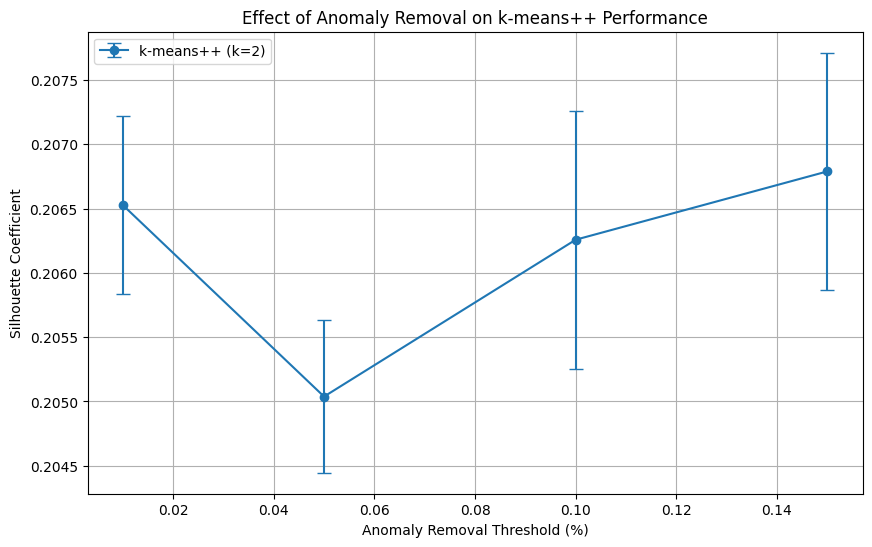

In [33]:
thresholds = [0.01, 0.05, 0.10, 0.15]
trees, sample_size = fit_isolation_forest(X_scaled, n_estimators=50, max_samples=64)
results = evaluate_kmeans_with_anomalies(X_scaled, thresholds, k=2)
plot_results(thresholds, results)